# SYNDy Demonstration

## Plotting Stuff

In [1]:
%matplotlib inline
%config InlineBackend.figure_formats=['svg']
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (14, 4)
gr ,  re,  bl,  yl,  bk = '#32AF4B', '#AF324B', '#323BAF', '#AFAF4B', '#000000'
lgr, lre, lbl, lyl, lbk = '#ccffcc', '#ffcccc', '#ccccff', '#AFAFBB', '#333333'

## SIR Example

$SIR$ is a simple model given by:

\begin{align}
\dot{S} &= -\beta SI           \\
\dot{I} &= \beta IS - \gamma I \\
\dot{R} &= \gamma I
\end{align}

In what follows, we just run some random $SIR$ model and use the produced data to test SINDy.

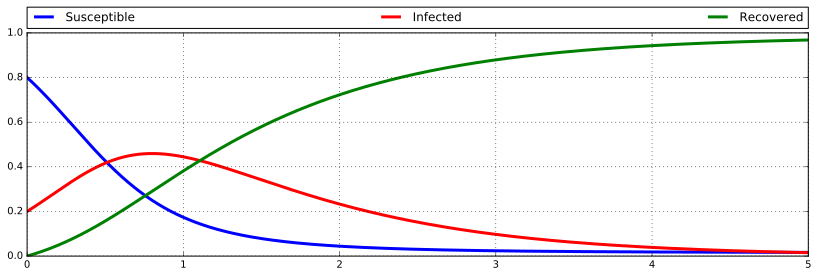

In [2]:
from SIR import *
sir = SIR(tstart=0.00, tend=5, dt=.001, beta=4, gamma=1, N=1)
sir.Initialize(S0=0.8, I0=0.2, R0=0);
sir.Simulate();
sir.PlotSIR(1)

## Prepare data

Of course in any real life situation, data is going to be noisy. So here we add noise to both data and its derivative. 

In [3]:
import random as rn
eps    = 0.05
noise  = eps*np.random.randn(3,sir._Time.shape[0])
dnoise = eps*np.random.randn(3,sir._Time.shape[0])

data  = np.transpose(np.insert(np.array([sir._SS , sir._II , sir._RR]) + noise,0,sir._Time,axis=0))
ddata = np.transpose(np.insert(np.array([sir._dSS, sir._dII, sir._dRR])+dnoise,0,sir._Time,axis=0))

## SINDy at work

Initiated a class for Sparse Identification from Numerical Dynamics
**** Derivative Set ****
**** Candidate functions library has been created ****
**** Performing regression. Please wait... ****
Iteration in progress:  1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 
**** Identification is complete. We now use it to simulate the system. ****


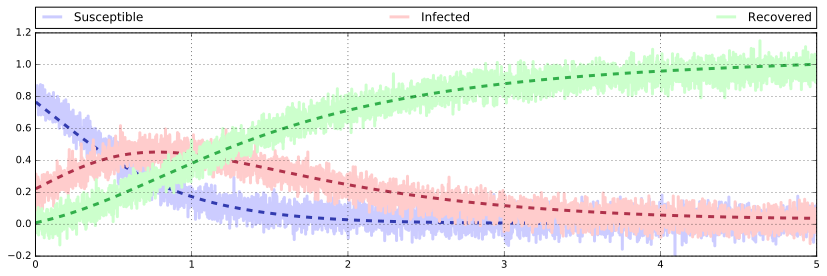

In [4]:
from SINDy import *
sin = SINDy(data=data,polyorder=2,usesine=False,cutoff=0.4)
sin.SetDerivative(ddata)
sin.RunSINDy(simulate=True)
sin.SINDyPlot(statesymbols=["Susceptible","Infected","Recovered"],
              datacolors=[lbl,lre,lgr],
              simcolors =[ bl, re, gr])

In [5]:
sin.StringModelView(StateVariables=["S","I","R"])

dS/dt =  1.054 R 
dI/dt =  0.919 S  +  1.673 I S  +  0.707 R^2 
dR/dt =  0.959 I 


## Example from ABM Simulation

In [6]:
from DataHandler import *

filter:  None
method:  CentralDifference


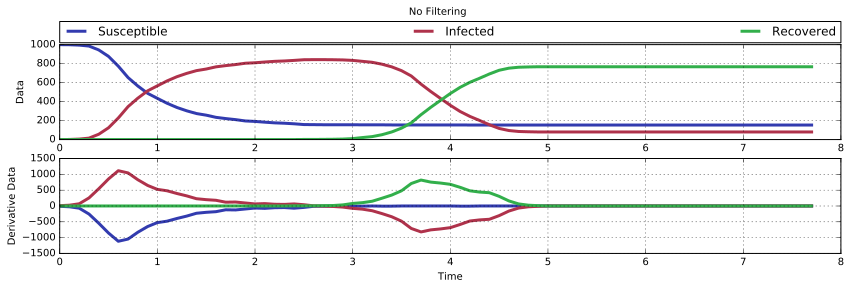

In [11]:
db = DataBaseObject(db='sim_v1_1_16_2017')
data = db.getSINDyReadyData()
D = Differentiate(data)    
D.DerivativePlot(fignum=2,labels=["Susceptible","Infected","Recovered"],
                   colors=[bl,re,gr],
                   title="No Filtering")

## SINDy

Initiated a class for Sparse Identification from Numerical Dynamics
**** Derivative Set ****
**** Candidate functions library has been created ****
**** Performing regression. Please wait... ****
Iteration in progress:  1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 
**** Identification is complete. We now use it to simulate the system. ****


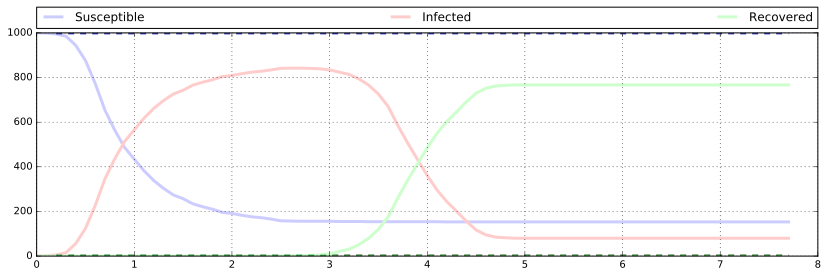

In [12]:
sind = SINDy(data=data,polyorder=4,usesine=False,cutoff=0.0005)
sind.SetDerivative(np.insert(D._dx,0,D._t,axis=1))
sind.RunSINDy(simulate=True)
sind.SINDyPlot(fignum=3,statesymbols=["Susceptible","Infected","Recovered"],
              datacolors=[lbl,lre,lgr],
              simcolors =[ bl, re, gr])

In [13]:
sind.StringModelView(StateVariables=["S","I","R"])

dS/dt =  0.002 S R  +  0.002 S R  +  2.678 S^2 R  +  0.089 I^2 R  +  0.002 S R  +  2.678 S^2 R  +  0.089 I^2 R  +  2.678 S^2 R  +  0.089 I^2 R  +  0.028 I S R^2  +  0.028 S R^3 
dI/dt =  0.348 I S R  +  0.348 I S R  +  0.348 I S R  +  0.003 S^2 R^2 
dR/dt =  0.287 I S R  +  0.287 I S R  +  0.287 I S R  +  0.009 I S R^2  +  0.009 S R^3 
